In [2]:
print('Hy')

import pandas as pd
import numpy as np
import matplotlib.pylab as plt

df = pd.read_csv("C:/Users/TRYMORE/Desktop/DataSets/creditdata.csv")
print('Columns:',df.columns)

#Separate continuos columns
num_cols = df.select_dtypes(include = ['number']).columns
print('Numerical Columns:', num_cols)

#Select categorical colums
cat_cols = df.select_dtypes(include = ['object', 'category']).columns
print('Categorical Columns:', cat_cols)

#Fill missing values for numerical variables
df[num_cols] = df[num_cols].fillna(df[num_cols].mean())

#Fill missing values for categorical variables
df[cat_cols] = df[cat_cols].fillna(df[cat_cols].mode())

#Fix data types once 
df = df.convert_dtypes()

#Drop column Customer ID since its not a variable
df.drop(columns = ['Customer_ID'],inplace = True)

#Label encording ordinal variables

from sklearn.preprocessing import LabelEncoder as ln
df['Level_of_Education'] = ln().fit_transform(df['Level_of_Education'])
df['Residence_Area'] = ln().fit_transform(df['Residence_Area'])
df['Tenure'] = ln().fit_transform(df['Tenure'])

#Norminal  variables Target encoding
#Install it with pip install category_encoders
import category_encoders as ce
#List the norminal variables
nominal_vars = ['Gender', 'Marital_Status', 'Employment_Status','Home_Ownership','Other_Solar_Product_purchase_on_installments']
#Initialize the encoder
target_encoder = ce.TargetEncoder(cols=nominal_vars)
#Fit and transform the data
df[nominal_vars] = target_encoder.fit_transform(df[nominal_vars], df['DefaultStatus'])

#Define the continuous variables
num_vars = ['Age', 'Number_of_Dependants', 'Product_Quantity', 'Total_Amount']

#Standard Scaler--Best for algorithms that assume normality eg linear models, SVM, Logistic Reg...it keeps outliers and centers data 
from sklearn.preprocessing import StandardScaler as stds
scaler = stds()
df[num_vars] = scaler.fit_transform(df[num_vars])

#MinMax Scaler--For algorithms that rely on distances or are sensitive to e scale eg KNN, Neural nets(nb use it when you dont have extreme outliers)
#from sklearn.preprocessing import MinMaxScaler as mms
#scaler = mms()
df[num_vars] = scaler.fit_transform(df[num_vars])

#Use Quantile transformer--robust for handling both scale and outliers
#from sklearn.preprocessing import QuantileTransformer as qt
#scaler = qt(n_quantiles=100)
#df[num_vars] = scaler.fit_transform(df[num_vars])


#Data Splitting
from sklearn.model_selection import train_test_split as tts
x = df.drop('DefaultStatus', axis = 1)
y = df['DefaultStatus']
x_train, x_test, y_train, y_test = tts(x, y, test_size = 0.3, random_state = 42)


Hy
Columns: Index(['Customer_ID', 'Gender', 'Age', 'Marital_Status', 'Employment_Status',
       'Level_of_Education', 'Residence_Area', 'Home_Ownership',
       'Number_of_Dependants', 'Product_Quantity', 'Total_Amount',
       'Other_Solar_Product_purchase_on_installments', 'Tenure',
       'DefaultStatus'],
      dtype='object')
Numerical Columns: Index(['Age', 'Number_of_Dependants', 'Product_Quantity', 'Total_Amount',
       'DefaultStatus'],
      dtype='object')
Categorical Columns: Index(['Customer_ID', 'Gender', 'Marital_Status', 'Employment_Status',
       'Level_of_Education', 'Residence_Area', 'Home_Ownership',
       'Other_Solar_Product_purchase_on_installments', 'Tenure'],
      dtype='object')


In [23]:
df.head

<bound method NDFrame.head of        Gender       Age  Marital_Status  Employment_Status  \
0    0.604938  1.097495        0.524823           0.765827   
1    0.496644  0.788537        0.524823           0.252474   
2    0.604938 -0.138335        0.505409           0.252474   
3    0.496644  0.247861        0.505409           0.765827   
4    0.496644 -1.683123        0.505409           0.252474   
..        ...       ...             ...                ...   
306  0.604938 -0.910729        0.524823           0.789593   
307  0.496644  0.479580        0.524823           0.281645   
308  0.604938 -0.292814        0.661973           0.789593   
309  0.604938  0.093383        0.661973           0.281645   
310  0.604938 -0.061096        0.505409           0.789593   

     Level_of_Education  Residence_Area  Home_Ownership  Number_of_Dependants  \
0                     1               1         0.85001              0.040872   
1                     2               0        0.218791        

Home_Ownership                                  28.186207
Employment_Status                               12.663539
Marital_Status                                   1.929374
Residence_Area                                   1.865306
Gender                                           1.536148
Tenure                                           1.078315
Total_Amount                                     1.057598
Other_Solar_Product_purchase_on_installments     1.003947
Age                                              0.926341
Product_Quantity                                 0.916489
Number_of_Dependants                             0.554016
Level_of_Education                               0.327411
dtype: float64
Intercept (log-odds): -2.1557531879063214
Intercept (odds): 0.11581592659863052

Classification Report:
Report:               precision    recall  f1-score   support

         0.0       0.92      0.89      0.91        38
         1.0       0.93      0.95      0.94        56

    accuracy 

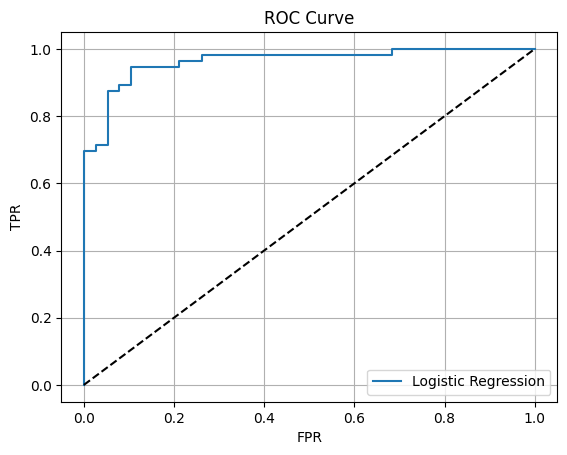

Accuracy: 0.925531914893617


In [3]:

###SUPERVISED MACHINE LEARNING METHODS

#Logistic Regression
from sklearn.linear_model import LogisticRegression as lg
model = lg(class_weight={0:1, 1:2}, max_iter=1000)
model.fit( x_train, y_train)


#Make predictions
predictions = model.predict(x_test)
from sklearn.metrics import accuracy_score as acs
score = acs(y_test, predictions)

#Odds Ratios
import numpy as np
odds_ratios = pd.Series(np.exp(model.coef_[0]),
index = x.columns)
print(odds_ratios.sort_values(ascending = False))

#Baseline log_odds
print('Intercept (log-odds):',
      model.intercept_[0])
print('Intercept (odds):',
      np.exp(model.intercept_[0]))


#Evaluation metrics
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
predictions = model.predict(x_test)
probs = model.predict_proba(x_test)[:, 1]

#Classification report
print('\nClassification Report:')
print('Report:',classification_report(y_test, predictions))

#Confusion matrix
print('\nConfusion matrix:')
print('Confusion:', confusion_matrix(y_test, predictions))

#ROC Curve
fpr, tpr, _ = roc_curve(y_test, probs)
plt.plot(fpr, tpr,
         label = 'Logistic Regression')
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC Curve')
plt.legend()
plt.grid()
plt.show()

print('Accuracy:', score)


Classification Report:
Report:               precision    recall  f1-score   support

         0.0       0.73      0.95      0.83        38
         1.0       0.96      0.77      0.85        56

    accuracy                           0.84        94
   macro avg       0.85      0.86      0.84        94
weighted avg       0.87      0.84      0.84        94


Confusion matrix:
Confusion: [[36  2]
 [13 43]]


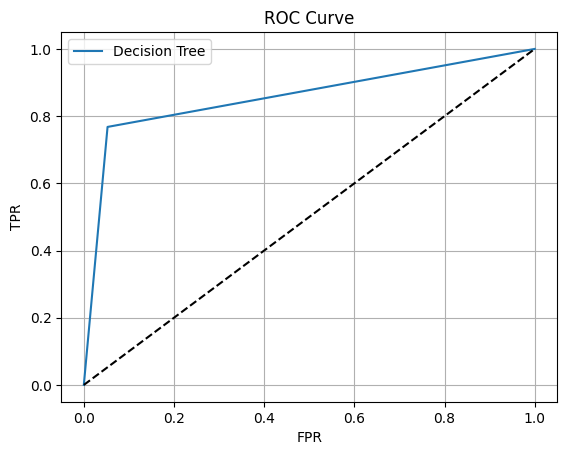

Accuracy: 0.8404255319148937


In [4]:
#DECISION TREE
from sklearn.tree import DecisionTreeClassifier as dt
model1 = dt(random_state = 42)
model1.fit(x_train, y_train)


#Evaluation metrics
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.metrics import accuracy_score as acs
predictions = model1.predict(x_test)
probs = model1.predict_proba(x_test)[:, 1]

#Classification report
print('\nClassification Report:')
print('Report:',classification_report(y_test, predictions))

#Confusion matrix
print('\nConfusion matrix:')
print('Confusion:', confusion_matrix(y_test, predictions))

#ROC Curve
fpr, tpr, _ = roc_curve(y_test, probs)
plt.plot(fpr, tpr,
         label = 'Decision Tree')
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC Curve')
plt.legend()
plt.grid()
plt.show()


score = acs(y_test, predictions)

print('Accuracy:', score)


Classification Report:
Report:               precision    recall  f1-score   support

         0.0       0.68      0.84      0.75        38
         1.0       0.87      0.73      0.80        56

    accuracy                           0.78        94
   macro avg       0.78      0.79      0.77        94
weighted avg       0.79      0.78      0.78        94


Confusion matrix:
Confusion: [[32  6]
 [15 41]]


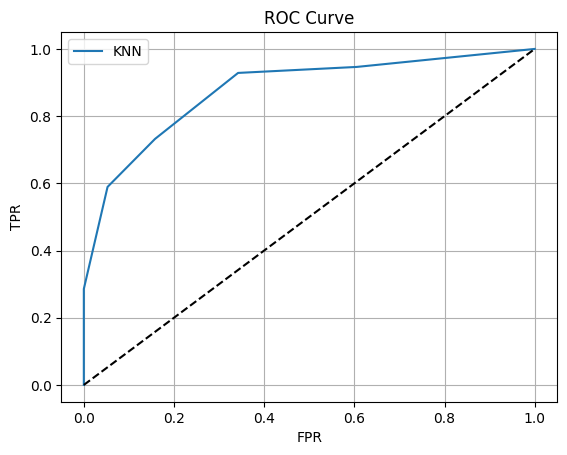

Accuracy: 0.776595744680851


In [5]:
#K-NEAREST NEIGHBORS
from sklearn.neighbors import KNeighborsClassifier as kn
model2 = kn(n_neighbors = 5)
model2.fit(x_train, y_train)


#Evaluation metrics
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
predictions = model2.predict(x_test)
probs = model2.predict_proba(x_test)[:, 1]

#Classification report
print('\nClassification Report:')
print('Report:',classification_report(y_test, predictions))

#Confusion matrix
print('\nConfusion matrix:')
print('Confusion:', confusion_matrix(y_test, predictions))

#ROC Curve
fpr, tpr, _ = roc_curve(y_test, probs)
plt.plot(fpr, tpr,
         label = 'KNN')
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC Curve')
plt.legend()
plt.grid()
plt.show()

from sklearn.metrics import accuracy_score as acs
score = acs(y_test, predictions)
print('Accuracy:', score)


Classification Report:
Report:               precision    recall  f1-score   support

         0.0       0.78      0.95      0.86        38
         1.0       0.96      0.82      0.88        56

    accuracy                           0.87        94
   macro avg       0.87      0.88      0.87        94
weighted avg       0.89      0.87      0.87        94


Confusion matrix:
Confusion: [[36  2]
 [10 46]]


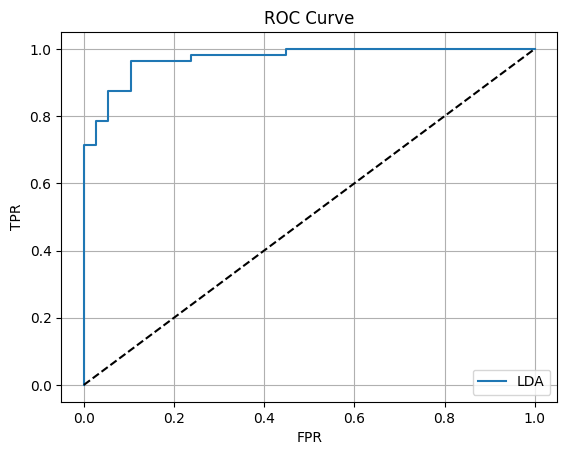

Accuracy: 0.8723404255319149


In [6]:
#Linear Discriminant Analysis
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as ld
model3 = ld()
model3.fit(x_train, y_train)


#Evaluation metrics
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
predictions = model3.predict(x_test)
probs = model3.predict_proba(x_test)[:, 1]

#Classification report
print('\nClassification Report:')
print('Report:',classification_report(y_test, predictions))

#Confusion matrix
print('\nConfusion matrix:')
print('Confusion:', confusion_matrix(y_test, predictions))

#ROC Curve
fpr, tpr, _ = roc_curve(y_test, probs)
plt.plot(fpr, tpr,
         label = 'LDA')
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC Curve')
plt.legend()
plt.grid()
plt.show()

from sklearn.metrics import accuracy_score as acs
score = acs(y_test, predictions)
print('Accuracy:', score)

c:\Users\TRYMORE\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 0 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
c:\Users\TRYMORE\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 1 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(



Classification Report:
Report:               precision    recall  f1-score   support

         0.0       0.81      0.92      0.86        38
         1.0       0.94      0.86      0.90        56

    accuracy                           0.88        94
   macro avg       0.88      0.89      0.88        94
weighted avg       0.89      0.88      0.88        94


Confusion matrix:
Confusion: [[35  3]
 [ 8 48]]


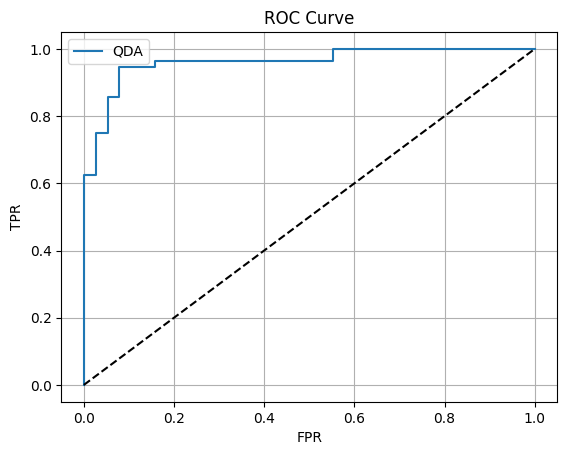

Accuracy: 0.8829787234042553


In [7]:
#Quadratic Discriminant Analysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as qd
model4 = qd()
model4.fit(x_train, y_train)


#Evaluation metrics
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
predictions = model4.predict(x_test)
probs = model4.predict_proba(x_test)[:, 1]

#Classification report
print('\nClassification Report:')
print('Report:',classification_report(y_test, predictions))

#Confusion matrix
print('\nConfusion matrix:')
print('Confusion:', confusion_matrix(y_test, predictions))

#ROC Curve
fpr, tpr, _ = roc_curve(y_test, probs)
plt.plot(fpr, tpr,
         label = 'QDA')
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC Curve')
plt.legend()
plt.grid()
plt.show()

from sklearn.metrics import accuracy_score as acs
score = acs(y_test, predictions)
print('Accuracy:', score)


Classification Report:
Report:               precision    recall  f1-score   support

         0.0       0.80      0.97      0.88        38
         1.0       0.98      0.84      0.90        56

    accuracy                           0.89        94
   macro avg       0.89      0.91      0.89        94
weighted avg       0.91      0.89      0.89        94


Confusion matrix:
Confusion: [[37  1]
 [ 9 47]]


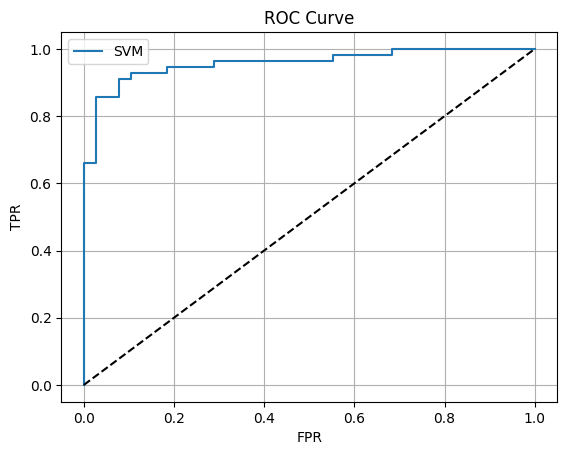

Accuracy: 0.8936170212765957


In [8]:
#SVM
from sklearn.svm import SVC as svm
model5 = svm(probability = True)
model5.fit(x_train, y_train)


#Evaluation metrics
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
predictions = model5.predict(x_test)
probs = model5.predict_proba(x_test)[:, 1]

#Classification report
print('\nClassification Report:')
print('Report:',classification_report(y_test, predictions))

#Confusion matrix
print('\nConfusion matrix:')
print('Confusion:', confusion_matrix(y_test, predictions))

#ROC Curve
fpr, tpr, _ = roc_curve(y_test, probs)
plt.plot(fpr, tpr,
         label = 'SVM')
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC Curve')
plt.legend()
plt.grid()
plt.show()

from sklearn.metrics import accuracy_score as acs
score = acs(y_test, predictions)
print('Accuracy:', score)


Classification Report:
Report:               precision    recall  f1-score   support

         0.0       0.77      0.97      0.86        38
         1.0       0.98      0.80      0.88        56

    accuracy                           0.87        94
   macro avg       0.87      0.89      0.87        94
weighted avg       0.89      0.87      0.87        94


Confusion matrix:
Confusion: [[37  1]
 [11 45]]


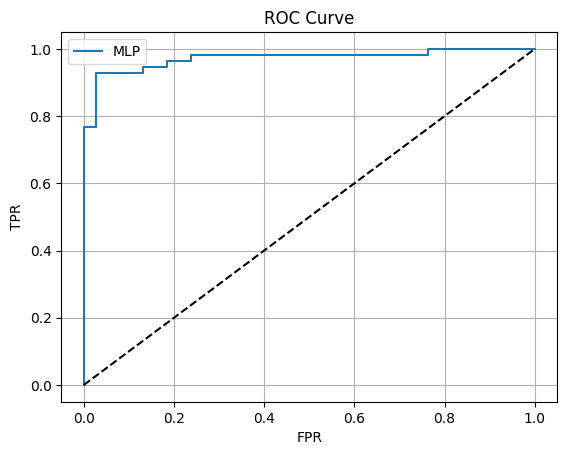

Accuracy: 0.8723404255319149


In [9]:
#MLP
from sklearn.neural_network import MLPClassifier as mlp
model6 = mlp(hidden_layer_sizes=(100, 50), activation='tanh', solver='adam', random_state=42, max_iter=300)
model6.fit(x_train, y_train)


#Evaluation metrics
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
predictions = model6.predict(x_test)
probs = model6.predict_proba(x_test)[:, 1]

#Classification report
print('\nClassification Report:')
print('Report:',classification_report(y_test, predictions))

#Confusion matrix
print('\nConfusion matrix:')
print('Confusion:', confusion_matrix(y_test, predictions))

#ROC Curve
fpr, tpr, _ = roc_curve(y_test, probs)
plt.plot(fpr, tpr,
         label = 'MLP')
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC Curve')
plt.legend()
plt.grid()
plt.show()

from sklearn.metrics import accuracy_score as acs
score = acs(y_test, predictions)
print('Accuracy:', score)


Classification Report:
Report:               precision    recall  f1-score   support

         0.0       0.78      0.95      0.86        38
         1.0       0.96      0.82      0.88        56

    accuracy                           0.87        94
   macro avg       0.87      0.88      0.87        94
weighted avg       0.89      0.87      0.87        94


Confusion matrix:
Confusion: [[36  2]
 [10 46]]


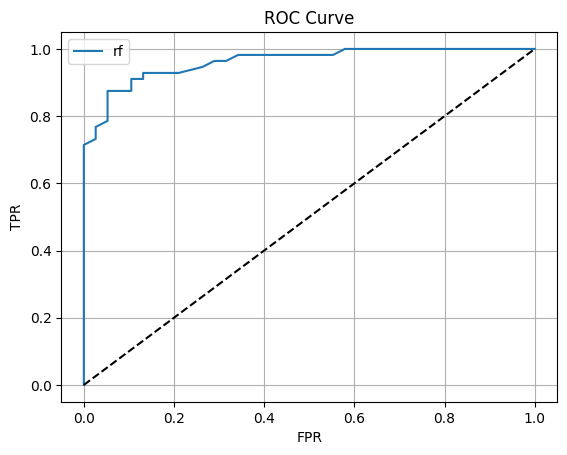

Accuracy: 0.8723404255319149


In [10]:

#ESEMBLE LEARNING
#Bagging
#Random Forest

from sklearn.ensemble import RandomForestClassifier as rf
model10 = rf(n_estimators=100, random_state=42)
model10.fit(x_train, y_train)


#Evaluation metrics
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
predictions = model10.predict(x_test)
probs = model10.predict_proba(x_test)[:, 1]

#Classification report
print('\nClassification Report:')
print('Report:',classification_report(y_test, predictions))

#Confusion matrix
print('\nConfusion matrix:')
print('Confusion:', confusion_matrix(y_test, predictions))

#ROC Curve
fpr, tpr, _ = roc_curve(y_test, probs)
plt.plot(fpr, tpr,
         label = 'rf')
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC Curve')
plt.legend()
plt.grid()
plt.show()

from sklearn.metrics import accuracy_score as acs
score = acs(y_test, predictions)
print('Accuracy:', score)


Classification Report:
Report:               precision    recall  f1-score   support

         0.0       0.80      0.95      0.87        38
         1.0       0.96      0.84      0.90        56

    accuracy                           0.88        94
   macro avg       0.88      0.89      0.88        94
weighted avg       0.89      0.88      0.88        94


Confusion matrix:
Confusion: [[36  2]
 [ 9 47]]


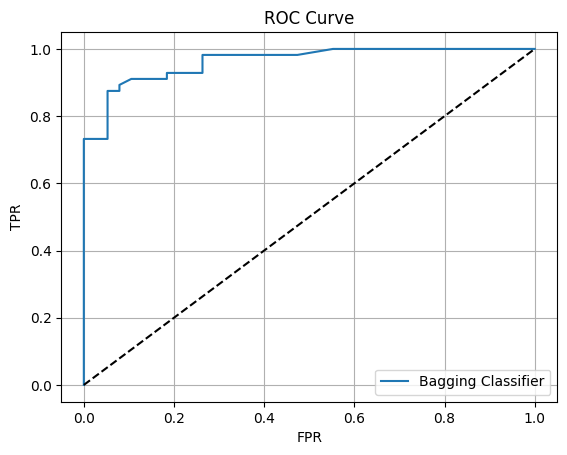

Accuracy: 0.8829787234042553


In [11]:
#ANOTHER METHOD OF BAGGING(THE MANUALY ONE)

from sklearn.ensemble import BaggingClassifier as bc
from sklearn.tree import DecisionTreeClassifier as dt

#Base estimator
base_dt = dt()

#Bagging Classifier
model11 = bc(estimator=base_dt, n_estimators=100, random_state=42)
model11.fit(x_train, y_train)


#Evaluation metrics
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
predictions = model11.predict(x_test)
probs = model11.predict_proba(x_test)[:, 1]

#Classification report
print('\nClassification Report:')
print('Report:',classification_report(y_test, predictions))

#Confusion matrix
print('\nConfusion matrix:')
print('Confusion:', confusion_matrix(y_test, predictions))

#ROC Curve
fpr, tpr, _ = roc_curve(y_test, probs)
plt.plot(fpr, tpr,
         label = 'Bagging Classifier')
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC Curve')
plt.legend()
plt.grid()
plt.show()

from sklearn.metrics import accuracy_score as acs
score = acs(y_test, predictions)
print('Accuracy:', score)


Classification Report:
Report:               precision    recall  f1-score   support

         0.0       0.82      0.95      0.88        38
         1.0       0.96      0.86      0.91        56

    accuracy                           0.89        94
   macro avg       0.89      0.90      0.89        94
weighted avg       0.90      0.89      0.89        94


Confusion matrix:
Confusion: [[36  2]
 [ 8 48]]


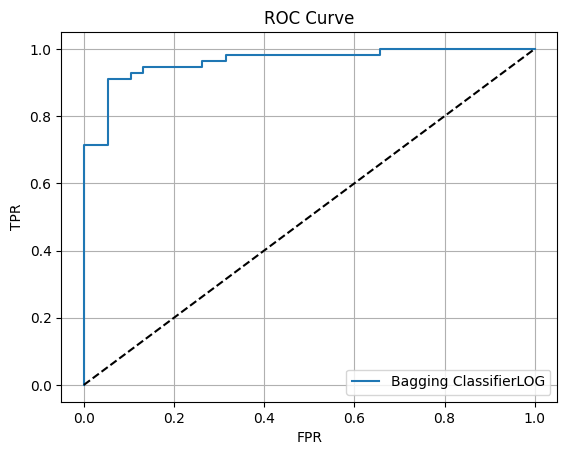

Accuracy: 0.8936170212765957


In [12]:
#BAGGING(USING LOGISTIC)

from sklearn.ensemble import BaggingClassifier as bc
from sklearn.linear_model import LogisticRegression as lg

#Base estimator
base_dt = lg()

#Bagging Classifier
model12 = bc(estimator=base_dt, n_estimators=100, random_state=42)
model12.fit(x_train, y_train)


#Evaluation metrics
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
predictions = model12.predict(x_test)
probs = model12.predict_proba(x_test)[:, 1]

#Classification report
print('\nClassification Report:')
print('Report:',classification_report(y_test, predictions))

#Confusion matrix
print('\nConfusion matrix:')
print('Confusion:', confusion_matrix(y_test, predictions))

#ROC Curve
fpr, tpr, _ = roc_curve(y_test, probs)
plt.plot(fpr, tpr,
         label = 'Bagging ClassifierLOG')
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC Curve')
plt.legend()
plt.grid()
plt.show()

from sklearn.metrics import accuracy_score as acs
score = acs(y_test, predictions)
print('Accuracy:', score)


Classification Report:
Report:               precision    recall  f1-score   support

         0.0       0.75      0.95      0.84        38
         1.0       0.96      0.79      0.86        56

    accuracy                           0.85        94
   macro avg       0.85      0.87      0.85        94
weighted avg       0.87      0.85      0.85        94


Confusion matrix:
Confusion: [[36  2]
 [12 44]]


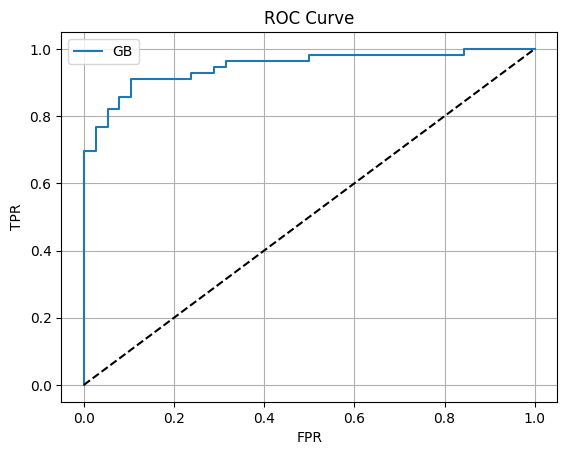

Accuracy: 0.851063829787234


In [13]:
#Boosting
#Gradient Boosting

#BAGGING(USING LOGISTIC)


from sklearn.ensemble import GradientBoostingClassifier as gb

model13 = gb(n_estimators=100, learning_rate=0.1, random_state=42)
model13.fit(x_train, y_train)


#Evaluation metrics
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
predictions = model13.predict(x_test)
probs = model13.predict_proba(x_test)[:, 1]

#Classification report
print('\nClassification Report:')
print('Report:',classification_report(y_test, predictions))

#Confusion matrix
print('\nConfusion matrix:')
print('Confusion:', confusion_matrix(y_test, predictions))

#ROC Curve
fpr, tpr, _ = roc_curve(y_test, probs)
plt.plot(fpr, tpr,
         label = 'GB')
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC Curve')
plt.legend()
plt.grid()
plt.show()

from sklearn.metrics import accuracy_score as acs
score = acs(y_test, predictions)
print('Accuracy:', score)


Classification Report:
Report:               precision    recall  f1-score   support

         0.0       0.81      0.92      0.86        38
         1.0       0.94      0.86      0.90        56

    accuracy                           0.88        94
   macro avg       0.88      0.89      0.88        94
weighted avg       0.89      0.88      0.88        94


Confusion matrix:
Confusion: [[35  3]
 [ 8 48]]


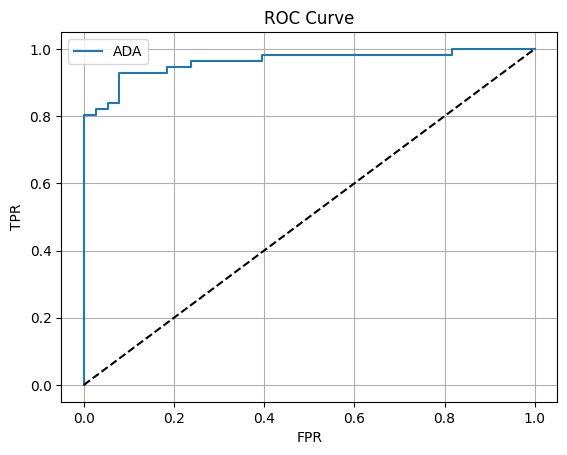

Accuracy: 0.8829787234042553


In [14]:
#Boosting
#ADABOOST

from sklearn.ensemble import AdaBoostClassifier as ad
from sklearn.tree import DecisionTreeClassifier as dt

#Base weak learner
base_model = dt(max_depth = 1)


#AdaBoost Classifier
model14 = ad(estimator = base_model, n_estimators=50, learning_rate=1.0, random_state=42)
model14.fit(x_train, y_train)


#Evaluation metrics
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
predictions = model14.predict(x_test)
probs = model14.predict_proba(x_test)[:, 1]

#Classification report
print('\nClassification Report:')
print('Report:',classification_report(y_test, predictions))

#Confusion matrix
print('\nConfusion matrix:')
print('Confusion:', confusion_matrix(y_test, predictions))

#ROC Curve
fpr, tpr, _ = roc_curve(y_test, probs)
plt.plot(fpr, tpr,
         label = 'ADA')
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC Curve')
plt.legend()
plt.grid()
plt.show()

from sklearn.metrics import accuracy_score as acs
score = acs(y_test, predictions)
print('Accuracy:', score)

In [15]:
#Meta Estimators

#Voting Classifier(trains many models and average(hardvoting)or use majority voting)
from sklearn.tree import DecisionTreeClassifier as dtc
from sklearn.linear_model import LogisticRegression as lg
from sklearn.neighbors import KNeighborsClassifier as knc
from sklearn.ensemble import VotingClassifier as vc
from sklearn.datasets import make_classification as mc
import matplotlib.pylab as plt

In [16]:
clf1 = model4
clf2 = knc(n_neighbors = 5).fit(x_train, y_train)
clf3 = vc(estimators = [('clf1', clf1), ('clf2', clf2)],
          voting = 'soft',
          weights = (0.5, 0.5))

clf3.fit(x_train, y_train)


c:\Users\TRYMORE\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 0 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
c:\Users\TRYMORE\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 1 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(


,estimators,"[('clf1', ...), ('clf2', ...)]"
,voting,'soft'
,weights,"(0.5, ...)"
,n_jobs,None
,flatten_transform,True
,verbose,False
,priors,None
,reg_param,0.0
,store_covariance,False
,tol,0.0001
,n_neighbors,5


In [17]:
#Which base model is better

from sklearn.metrics import accuracy_score as acs

predLR = model6.predict(x_test)
predKN = clf2.predict(x_test)
predVC = clf3.predict(x_test)

scoreLR = acs(y_test, predLR)
scoreKN = acs(y_test, predKN)
scoreVC = acs(y_test, predVC)
print('Accuracy of QD:', scoreLR)
print('Accuracy of KN:', scoreKN)
print('Accuracy of VC:', scoreVC)

Accuracy of QD: 0.8723404255319149
Accuracy of KN: 0.776595744680851
Accuracy of VC: 0.8936170212765957


In [22]:
df.head

<bound method NDFrame.head of        Gender       Age  Marital_Status  Employment_Status  \
0    0.604938  1.097495        0.524823           0.765827   
1    0.496644  0.788537        0.524823           0.252474   
2    0.604938 -0.138335        0.505409           0.252474   
3    0.496644  0.247861        0.505409           0.765827   
4    0.496644 -1.683123        0.505409           0.252474   
..        ...       ...             ...                ...   
306  0.604938 -0.910729        0.524823           0.789593   
307  0.496644  0.479580        0.524823           0.281645   
308  0.604938 -0.292814        0.661973           0.789593   
309  0.604938  0.093383        0.661973           0.281645   
310  0.604938 -0.061096        0.505409           0.789593   

     Level_of_Education  Residence_Area  Home_Ownership  Number_of_Dependants  \
0                     1               1         0.85001              0.040872   
1                     2               0        0.218791        

In [18]:
#Saving the models so that the next time we use them, we wont train again, but we rather only load and use them
import joblib
joblib.dump(model, 'model.pkl')
joblib.dump(model1, 'model1.pkl')
joblib.dump(model2, 'model2.pkl')
joblib.dump(model3, 'model3.pkl')
joblib.dump(model4, 'model4.pkl')
joblib.dump(model5, 'model5.pkl')
joblib.dump(model6, 'model6.pkl')

joblib.dump(model10, 'model10.pkl')
joblib.dump(model11, 'model11.pkl')
joblib.dump(model12, 'model12.pkl')
joblib.dump(model13, 'model13.pkl')
joblib.dump(model14, 'model14.pkl')

['model14.pkl']

In [19]:
#Loading and using the trained mode...an example
import joblib
import pickle
import streamlit as st
LR = joblib.load('model.pkl')

def main():
    st.title('Credit Risk Prediction Model')

#Input Variables
#User inputs
age = st.number_input("Age", min_value=18, max_value=100, value=30)
marital_status = st.selectbox("Marital Status", ['Single', 'Married', 'Divorced'])  # example categories
employment_status = st.selectbox("Employment Status", ['Employed', 'Unemployed'])
level_of_education = st.selectbox("Level of Education", [0, 1, 2])  # ordinal values you used during encoding
residence_area = st.selectbox("Residence Area", [0, 1, 2])
home_ownership = st.selectbox("Home Ownership", ['Yes', 'No'])
dependents = st.number_input("Number of Dependants", min_value=0)
product_quantity = st.number_input("Product Quantity", min_value=0)
total_amount = st.number_input("Total Amount", min_value=0.0)

#Prepare input
input_df = pd.DataFrame({
    'Age': [age],
    'Marital_Status': [marital_status],
    'Employment_Status': [employment_status],
    'Level_of_Education': [level_of_education],
    'Residence_Area': [residence_area],
    'Home_Ownership': [home_ownership],
    'Number_of_Dependants': [dependents],
    'Product_Quantity': [product_quantity],
    'Total_Amount': [total_amount]
})

#Predict
if st.button("Predict"):
    prediction = model.predict(input_df)
    st.success(f"Prediction: {'Default' if prediction[0] == 1 else 'No Default'}")

2025-12-30 16:29:15.193 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-12-30 16:29:15.193 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-12-30 16:29:15.193 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-12-30 16:29:15.210 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-12-30 16:29:15.210 WARNING streamlit.runtime.state.session_state_proxy: Session state does not function when running a script without `streamlit run`
2025-12-30 16:29:15.246 WARNING streamlit.runtime.scriptrunner_utils.script_run_c

<function matplotlib.pyplot.show(close=None, block=None)>

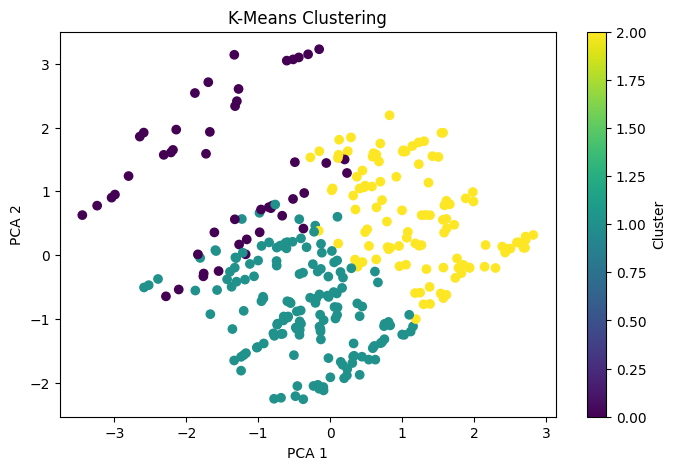

In [20]:
##UNSUPERVISED MACHINE LEARNING METHODS

# K-Means Clustering
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

#Now the response variable is not allowed so drop it
x = df.drop('DefaultStatus', axis = 1)

#With three clusters
kmeans = KMeans(n_clusters = 3, random_state = 42)
kmeans.fit(x)

labels = kmeans.labels_

#Add cluster labels to e DataFrame
x['Cluster'] = labels

#Visualize the clusters with PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
x_pca = pca.fit_transform(x.drop('Cluster', axis = 1))

plt.figure(figsize=(8, 5))
plt.scatter(x_pca[:, 0], x_pca[:, 1], c = x['Cluster'], cmap = 'viridis')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('K-Means Clustering')
plt.colorbar(label='Cluster')
plt.show